<a href="https://colab.research.google.com/github/HaveFaith07/HaveFaith-Project/blob/main/Business_project_in_Big_data_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

M516 Business project in Big Data and AI

Mitesh Patole
GH1022321

Git:https://github.com/HaveFaith07/HaveFaith-Project

Kaggle: https://www.kaggle.com/datasets/ruchi798/source-based-news-classification/data
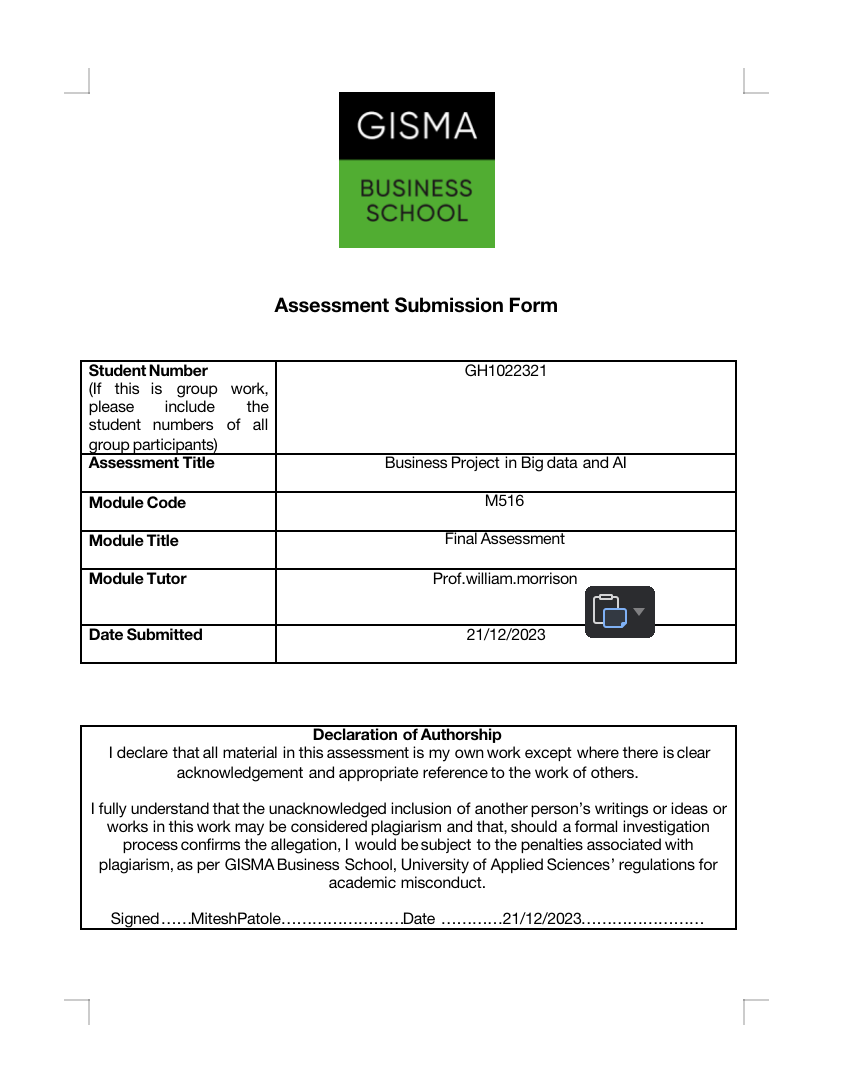
Github:https://github.com/HaveFaith07/HaveFaith-Project

Importing Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as matplt
from sklearn.feature_extraction.text import CountVectorizer
import cufflinks as cfl
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pandas import DataFrame




Loading the data set

In [67]:
df = pd.read_csv('news_articles.csv')
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [68]:
print("Missing values in Data")
print(df.isna().sum())

Missing values in Data
author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64


In [69]:
df = df.dropna()
df.count()

author                     2045
published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

In [70]:
print("Missing values")
print(df.isna().sum())

Missing values
author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64


In [71]:
df['type'].unique()


array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

Visualization

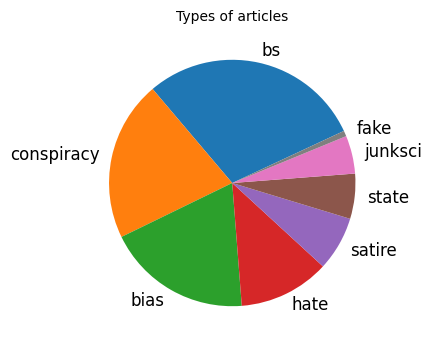

In [72]:
df['type'].value_counts().plot.pie(figsize = (4,4), startangle = 25, fontsize=12)
matplt.title('Types of articles', fontsize=10)
matplt.axis('off')
matplt.show()

Coun vectorizer, Unigram, bigram and trigram

In [73]:

def get_top_n_words(corpus, n=None):
    vector = CountVectorizer().fit(corpus)
    bag_of_words = vector.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vector.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vector = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vector.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vector = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vector.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [74]:
cfl.go_offline()
cfl.set_config_file(offline=False, world_readable=True)

TOkenization

In [75]:


nltk.download('stopwords')
nltk.download('punkt')

stopwords_english = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.lower() not in stopwords_english]
    return ' '.join(filtered_words)


df['text_without_stopwords'] = df['text'].apply(remove_stopwords)


print(df[['text', 'text_without_stopwords']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                   text  \
0     print they should pay all the back all the mon...   
1     why did attorney general loretta lynch plead t...   
2     red state  \nfox news sunday reported this mor...   
3     email kayla mueller was a prisoner and torture...   
4     email healthcare reform to make america great ...   
...                                                 ...   
2041  prof canoes reek of genocide white privilege c...   
2042  teens walk free after gangrape conviction judg...   
2043  school named for munichmassacre mastermind ter...   
2044  wars and rumors of wars russia unveils satan  ...   
2045  check out hillarythemed haunted house anticlin...   

                                 text_without_stopwords  
0     print pay back money plus interest entire fami...  
1     attorney general loretta lynch plead fifth bar...  
2     red state fox news sunday reported morning ant...  
3     email kayla mueller prisoner tortured isis cha...  
4

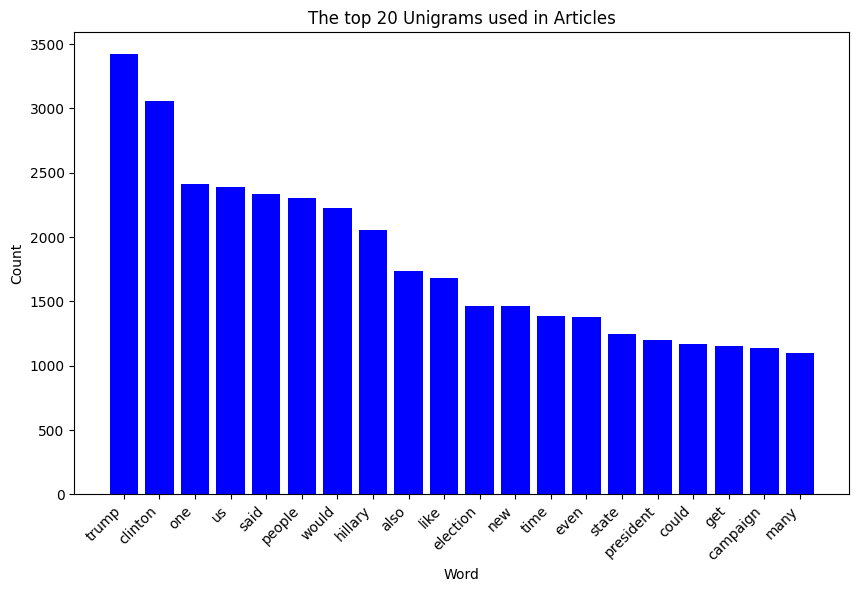

In [76]:
common_words = get_top_n_words(df['text_without_stopwords'], 20)

df2 = DataFrame(common_words, columns=['word', 'count'])
sorted_df = df2.groupby('word').sum()['count'].sort_values(ascending=False)

matplt.figure(figsize=(10, 6))
matplt.bar(sorted_df.index, sorted_df.values, color='blue')
matplt.title('The top 20 Unigrams used in Articles')
matplt.xlabel('Word')
matplt.ylabel('Count')
matplt.xticks(rotation=45, ha='right')
matplt.show()



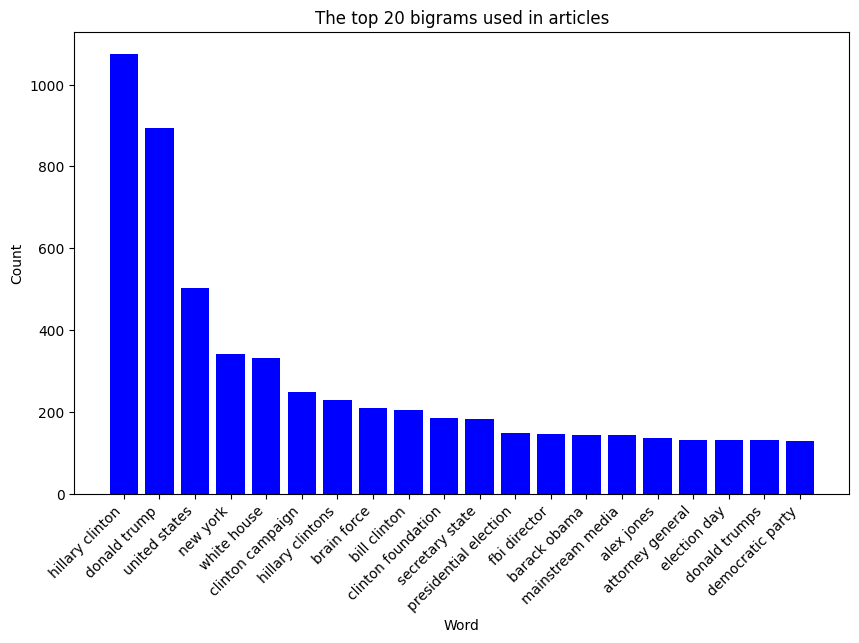

In [77]:

common_words = get_top_n_bigram(df['text_without_stopwords'], 20)

df3 = DataFrame(common_words, columns=['word', 'count'])
sorted_df = df3.groupby('word').sum()['count'].sort_values(ascending=False)

matplt.figure(figsize=(10, 6))
matplt.bar(sorted_df.index, sorted_df.values, color='blue')
matplt.title('The top 20 bigrams used in articles')
matplt.xlabel('Word')
matplt.ylabel('Count')
matplt.xticks(rotation=45, ha='right')
matplt.show()



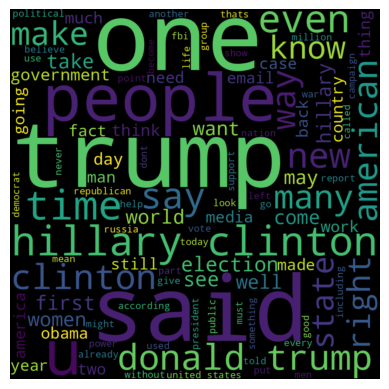

In [78]:
from wordcloud import WordCloud

wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['text_without_stopwords']))
matplt.imshow(wc, interpolation="bilinear")
matplt.axis('off')
matplt.show()

In [79]:
df['site_url'].unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'abeldanger.net', 'abovetopsecret.com', 'activistpost.com',
       'addictinginfo.org', 'adobochronicles.com', 'ahtribune.com',
       'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'dailywire.com', 'darkmoon.me',
       'davidduke.com', 'davidstockmanscontracorner.com',
       'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com',
       'fromthetrenchesworldreport.com', 'frontpagemag.com',
       'galacticconnection.com', 'globalresearch.ca', 'infowars.com',
       'intrepidreport.com', 'legorafi.fr', 'madworldnews.com',
       'naturalnews.com', 'newstarget.com', 'politicususa.com',
       'presstv.com', 'pre

In [80]:
def change(x):
    dic = {'Real': 1, 'Fake': 0}
    return dic[x]

df['label'] = df['label'].apply(change)


In [81]:
from collections import OrderedDict

val_real=[]
val_fake=[]

for i,row in df.iterrows():
    val = row['site_url']
    if row['label'] == 1:
        val_real.append(val)
    elif row['label']== 0:
        val_fake.append(val)


uniqueValues_real = list(OrderedDict.fromkeys(val_real))

print(f"Websites publishing real news:{uniqueValues_real}\n")

Websites publishing real news:['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'davidduke.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'newstarget.com', 'politicususa.com', 'presstv.com', 'presstv.ir', 'prisonplanet.com', 'proudemocrat.com', 'redstatewatcher.com', 'returnofkings.com', 'washingtonsblog.com', 'westernjournalism.com', 'whydontyoutrythis.com', 'wnd.com']



In [82]:
uniqueValues_fake = list(OrderedDict.fromkeys(val_fake))
print(f"Websites publishing fake news:{uniqueValues_fake}\n")

Websites publishing fake news:['21stcenturywire.com', 'abcnews.com.co', 'abeldanger.net', 'abovetopsecret.com', 'activistpost.com', 'adobochronicles.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'awdnews.com', 'barenakedislam.com', 'clickhole.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press', 'dennismichaellynch.com', 'departed.co', 'der-postillon.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'galacticconnection.com', 'globalresearch.ca', 'infowars.com', 'intrepidreport.com', 'legorafi.fr', 'madworldnews.com', 'naturalnews.com', 'newstarget.com', 'presstv.ir', 'prisonplanet.com', 'projectveritas.com', 'returnofkings.com', 'shiftfrequency.com', 'thedailysheeple.com', 'theeconomiccollapseblog.com', 'thefreethoughtproject.com',

In [83]:
real_set = set(uniqueValues_real)
fake_set = set(uniqueValues_fake)

print(f"Websites publishing both real and fake news:{real_set & fake_set}\n")

Websites publishing both real and fake news:{'newstarget.com', 'westernjournalism.com', 'washingtonsblog.com', 'presstv.ir', 'returnofkings.com', 'frontpagemag.com', 'prisonplanet.com', 'fromthetrenchesworldreport.com', 'davidduke.com'}



In [84]:
def change(x):
    dic1 = {'bias': 0, 'conspiracy': 1, 'fake': 2, 'bs': 3, 'satire': 4, 'hate': 5, 'junksci': 6, 'state': 7}
    # Check if x is in the dictionary, if not, return a default value (e.g., -1)
    return dic1.get(x)

df['type'] = df['type'].apply(change)


In [85]:
df_type = df[['site_url','type']]

val_bias=[]
val_conspiracy=[]
val_fake1=[]
val_bs=[]
val_satire=[]
val_hate=[]
val_junksci=[]
val_state=[]

for i,row in df_type.iterrows():
    val = row['site_url']
    if row['type'] == 0:
        val_bias.append(val)
    elif row['type']== 1:
        val_conspiracy.append(val)
    elif row['type']== 2:
        val_fake1.append(val)
    elif row['type']== 3:
        val_bs.append(val)
    elif row['type']== 4:
        val_satire.append(val)
    elif row['type']== 5:
        val_hate.append(val)
    elif row['type']== 6:
        val_junksci.append(val)
    elif row['type']== 7:
        val_state.append(val)


In [86]:
uv_bias = list(OrderedDict.fromkeys(val_bias))
uv_conspiracy = list(OrderedDict.fromkeys(val_conspiracy))
uv_fake = list(OrderedDict.fromkeys(val_fake1))
uv_bs = list(OrderedDict.fromkeys(val_bs))
uv_satire = list(OrderedDict.fromkeys(val_satire))
uv_hate = list(OrderedDict.fromkeys(val_hate))
uv_junksci = list(OrderedDict.fromkeys(val_junksci))
uv_state = list(OrderedDict.fromkeys(val_state))


i=0
for lst in (uv_bias,uv_conspiracy,uv_fake,uv_bs,uv_satire, uv_hate,uv_junksci,uv_state):
    print(f"Source URLs for type:{lst}\n")
    i+=1

Source URLs for type:['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'newstarget.com', 'politicususa.com', 'prisonplanet.com', 'proudemocrat.com', 'washingtonsblog.com', 'westernjournalism.com', 'whydontyoutrythis.com', 'wnd.com']

Source URLs for type:['21stcenturywire.com', 'activistpost.com', 'awdnews.com', 'galacticconnection.com', 'globalresearch.ca', 'infowars.com', 'naturalnews.com', 'newstarget.com', 'presstv.ir', 'prisonplanet.com']

Source URLs for type:['abcnews.com.co', 'adobochronicles.com']

Source URLs for type:['abeldanger.net', 'abovetopsecret.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'barenakedislam.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press', 'dennismichaellynch.com', 'departed.co', 'der-postillo

In [87]:
df1 = df.sample(frac=1)
df1.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
1861,Albert Wesker,2016-11-02T08:03:53.096+02:00,comment on im the law today nga cop fired aft...,this is why megyn kelly has fallen to th in fo...,english,thefreethoughtproject.com,http://thefreethoughtproject.com/wp-content/up...,3,0,solarpowered pipe desalinates billion gallons ...,megyn kelly fallen th fox show ratings paid ki...,1.0
844,Dr. Patrick Slattery,2016-11-16T11:07:07.314+02:00,slattery and dankof we won now what,editorial by dr david duke \ntrump appoints m...,english,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,5,1,slattery dankof,editorial dr david duke trump appoints men tak...,1.0
1196,BBC,2016-10-28T01:12:00.354+03:00,mosquito army released in zika fight in brazil...,shocking michele obama hillary caught glamori...,english,infowars.com,http://hw.infowars.com/wp-content/uploads/2016...,1,0,uk economy grows three months brexit vote,shocking michele obama hillary caught glamoriz...,1.0
1043,Ann Coulter,2016-10-27T09:20:33.390+03:00,our new country women and minorities hit hardest,hillary clinton tops islamist money in politic...,english,frontpagemag.com,http://www.frontpagemag.com/sites/default/file...,5,1,weird bans women iran,hillary clinton tops islamist money politics l...,1.0
297,No Author,2016-11-03T11:22:00.000+02:00,trump supporters booby trap polling place and ...,on november pm \nweve all seen pictures of...,english,addictinginfo.org,No Image URL,0,1,trump supporters booby trap polling place spil...,november pm weve seen pictures trumps home sur...,0.0


In [88]:
y = df1.type

x = df1.loc[:,['site_url','text_without_stopwords']]
x['source'] = x["site_url"].astype(str) +" "+ x["text_without_stopwords"]
x = x.drop(['site_url','text_without_stopwords'],axis=1)
x = x.source

Spliting the data set

In [89]:
from sklearn.model_selection import train_test_split
import sklearn.model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names_out())

In [90]:
tfidf_vect

TfidfVectorizer(stop_words='english')

In [91]:
tfidf_train.shape

(1431, 38754)

Training and testing

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier


model_rf = RandomForestClassifier(n_estimators=100,random_state=0)
model_rf.fit(tfidf_train,y_train)
y_pred1 = model_rf.predict(tfidf_test)
model_rf_score = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" % model_rf_score)




model_SVM = SVC(kernel='linear')
model_SVM.fit(tfidf_train, y_train)
y_pred_svm = model_SVM.predict(tfidf_test)
model_SVM_score = metrics.accuracy_score(y_test, y_pred_svm)
print("SVM accuracy:  %0.3f" % model_SVM_score)




model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model_GB.fit(tfidf_train, y_train)
y_pred_gb = model_GB.predict(tfidf_test)
model_GB_score = metrics.accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting accuracy:  %0.3f" % model_GB_score)

accuracy:  0.845
SVM accuracy:  0.689
Gradient Boosting accuracy:  0.969


In [93]:
!jupyter nbconvert --to html Business_project_in_Big_data_and_AI.ipynb

[NbConvertApp] WARNING | pattern 'Business_project_in_Big_data_and_AI.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer